### 高斯混合模型

<img src="图片/815508084.jpg">

### GMM的极大似然估计

<img src = "图片/494606148.jpg">

### GMM的EM铺垫

<img src="图片/1162887277.jpg">

### E-step 求Q(θ, θ^t)

<img src="图片/1219584836.jpg">

#### 上面的简化理论，可以参看徐亦达老师的notes  em.pdf

### M-step
<img src="图片/630426308.jpg">

### 使用sklearn中的GMM模型

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [25]:
# 创建初始数据

n_samples = 300

np.random.seed(666)

shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

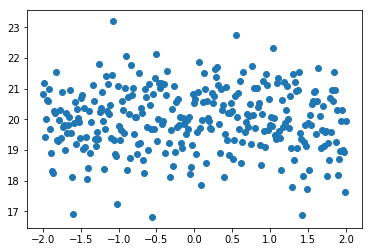

In [43]:
shifted_gaussian.shape
plt.scatter(np.linspace(-2,2,num=300),shifted_gaussian[:,0])
plt.show()

In [27]:
shifted_gaussian[0:10]

array([[20.82418808, 20.479966  ],
       [21.17346801, 20.90904807],
       [19.42827855, 19.89050273],
       [20.01902826, 19.05623894],
       [20.64057315, 19.21355683],
       [20.60886999, 19.06898815],
       [20.97822225, 19.26308194],
       [19.70126738, 19.53941263],
       [18.91120701, 19.42422925],
       [18.31709923, 20.22918525]])

In [28]:
cov = np.array([[0., -0.7], [3.5, .7]])
cov

array([[ 0. , -0.7],
       [ 3.5,  0.7]])

In [30]:
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), cov)
stretched_gaussian[0:10]

array([[ 1.64429792,  0.25349131],
       [ 3.80522993,  1.14137678],
       [ 2.70966888,  0.23278941],
       [ 1.17957368,  0.2377987 ],
       [ 1.08598328, -0.03128743],
       [-0.38735067,  0.23609863],
       [ 6.78498203,  0.9099465 ],
       [-1.79493348,  0.11829166],
       [ 1.78038521,  0.4252905 ],
       [-3.66493705,  0.27252592]])

In [31]:
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

In [32]:
X_train.shape

(600, 2)

In [35]:
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [37]:
from matplotlib.colors import LogNorm

x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 3, 10))

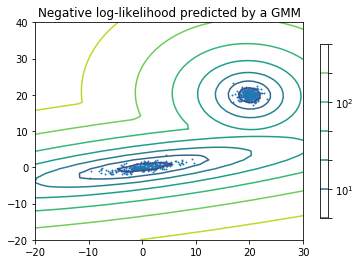

In [38]:
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()